In [1]:
from matplotlib import pyplot as plt
import pandas as pd
from collections import defaultdict
import numpy as np
import os

In [2]:
modellist = ["RandomForest", "MLP", "MLP_onehot", "baseline1", "baseline0"]
baselist = {
    10000: ["allwgiven_10000", "allwogiven_10000", "allworank_10000", "allworankgiven_10000"],
    0: ["allwgiven_0", "allwogiven_0", "allworank_0", "allworankgiven_0"]
}
features = ["All", "identity", "node reindex", "degree", "eigenvec", "kcore", "pagerank", "degree_rank", "eigenvec_rank", "kcore_rank", "pagerank_rank", "affiliation", "year", "conf", "deg_min", "deg_max", "deg_avg", "cs", "de", "th", "se"]

In [3]:
def read_result(path):
    ret  = {}
    with open(path, "r") as f:
        for line in f.readlines():
            line = line.rstrip()
            evalname, evalvalue = line.split("\t")
            ret[evalname] = float(evalvalue)
    return ret

In [4]:
# k = 10000
# evallist = ["accuracy", "precision_micro", "precision_macro", "recall_micro", "recall_macro", "f1_micro", "f1_macro"]
# for k in [10000, 0]:
#     outputpath = "results/agg_" + str(k) + ".txt"
#     with open(outputpath, "w") as f:
#         f.write("model,target feature,base," + ",".join(evallist) + "\n")
        
#     for modelname in modellist:
#         if "baseline" in modelname:
#             path = "nongraph_results/" + modelname + "_" + str(k) + ".txt"
#             if os.path.isfile(path):
#                 evaldict = read_result(path)
#                 with open(outputpath, "+a") as f:
#                     f.write(",".join([modelname,"-","-"] + [str(evaldict[en]) for en in evallist]) + "\n")
#             else:
#                 print("No", path)
#         else:
#             for basename in baselist[k]:
#                 for target in features:
#                     path = "nongraph_results/" + modelname + "_" + target + "_" + basename + ".txt"
#                     if os.path.isfile(path):
#                         evaldict = read_result(path)
#                         with open(outputpath, "+a") as f:
#                             f.write(",".join([modelname,target,basename] + [str(evaldict[en]) for en in evallist]) + "\n")
#                     else:
#                         print("No", path)

In [5]:
base2model2eval = defaultdict(dict) # {allwgiven,allwogiven, allworank, allworankgiven} -> {RandomForest, MLP, MLP_onehot} -> {accuracy,}
for k in [10000, 0]:
    for basename in baselist[k]:
        for modelname in modellist:
            if "baseline" in modelname:
                path = "nongraph_results/" + modelname + "_" + str(k) + ".txt"
            else:
                path = "nongraph_results/" + modelname + "_All_" + basename + ".txt"
            if os.path.isfile(path):
                evaldict = read_result(path)
                base2model2eval[basename][modelname] = evaldict
            else:
                print("No", path)

No nongraph_results/MLP_onehot_All_allwgiven_10000.txt
No nongraph_results/MLP_onehot_All_allworank_10000.txt
No nongraph_results/MLP_onehot_All_allwgiven_0.txt
No nongraph_results/MLP_onehot_All_allwogiven_0.txt
No nongraph_results/MLP_onehot_All_allworank_0.txt
No nongraph_results/MLP_onehot_All_allworankgiven_0.txt


In [6]:
print(baselist[10000][0])
print(modellist[0])
print(base2model2eval["allwgiven_10000"])

allwgiven_10000
RandomForest
{'RandomForest': {'accuracy': 0.666108553090554, 'precision_micro': 0.666108553090554, 'precision_macro': 0.6701071214523472, 'recall_micro': 0.666108553090554, 'recall_macro': 0.6553343332280813, 'f1_micro': 0.666108553090554, 'f1_macro': 0.6608250776191799}, 'MLP': {'accuracy': 0.6449002371982698, 'precision_micro': 0.6449002371982698, 'precision_macro': 0.6496218821874843, 'recall_micro': 0.6449002371982698, 'recall_macro': 0.6207888117040311, 'f1_micro': 0.6449002371982698, 'f1_macro': 0.6291270003054648}, 'baseline1': {'accuracy': 0.44188642388726107, 'precision_micro': 0.44188642388726107, 'precision_macro': 0.14729547462908701, 'recall_micro': 0.44188642388726107, 'recall_macro': 0.3333333333333333, 'f1_micro': 0.44188642388726107, 'f1_macro': 0.2043093993935875}, 'baseline0': {'accuracy': 0.3375191851541789, 'precision_micro': 0.3375191851541789, 'precision_macro': 0.3374157439361813, 'recall_micro': 0.3375191851541789, 'recall_macro': 0.33880417850

['accuracy', 'precision_micro', 'precision_macro', 'recall_micro', 'recall_macro', 'f1_micro', 'f1_macro']


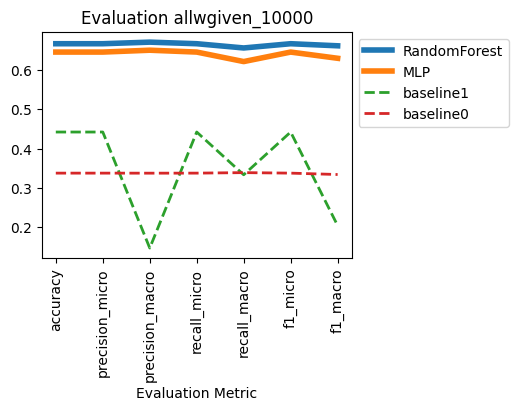

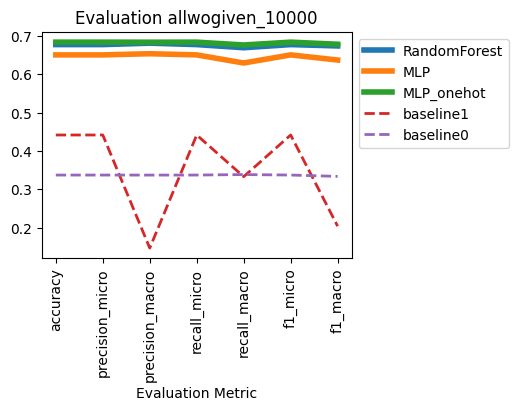

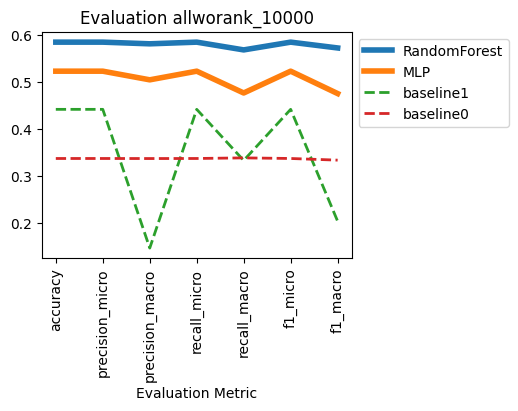

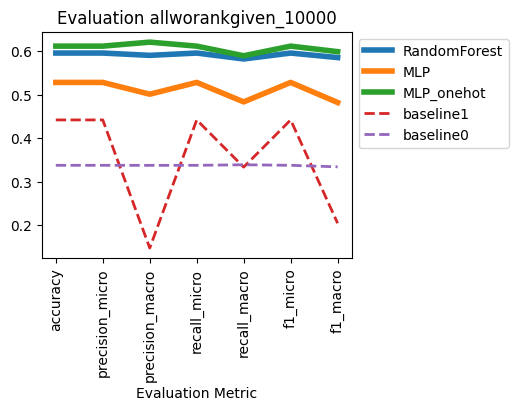

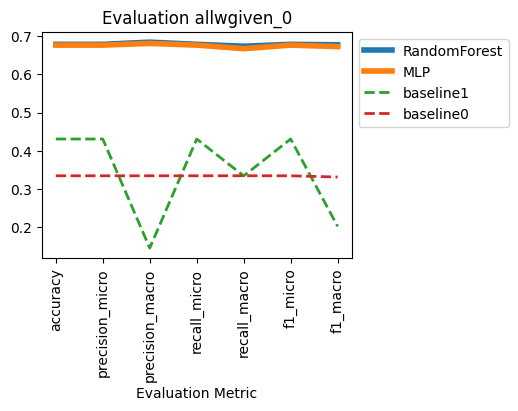

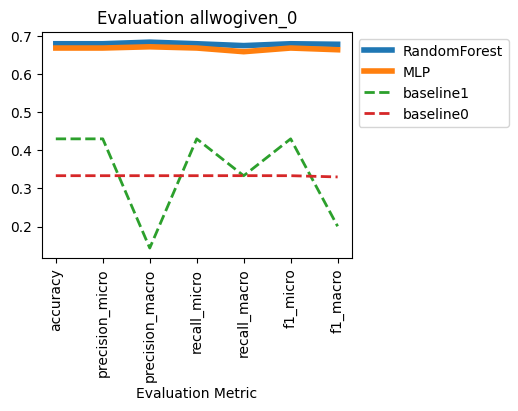

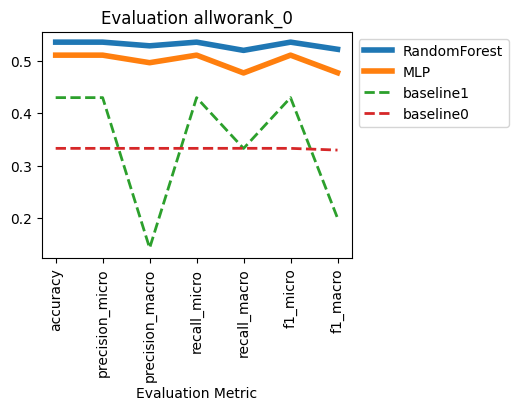

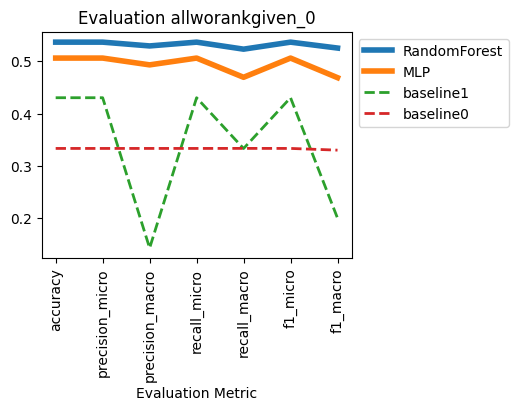

In [7]:
xs = list(base2model2eval[baselist[10000][0]][modellist[0]].keys())
print(xs)

# property legend
for k in [10000, 0]:
    for basename in baselist[k]:
        plt.figure(dpi=100, figsize=(4,3))
        for modelname in base2model2eval[basename].keys():
            if "baseline" in modelname:
                plt.plot(xs, [base2model2eval[basename][modelname][x] for x in xs], linewidth=2, linestyle='dashed', label=modelname)
            else:
                plt.plot(xs, [base2model2eval[basename][modelname][x] for x in xs], linewidth=4, label=modelname)
        plt.legend(bbox_to_anchor=(1,1))
        plt.xlabel("Evaluation Metric")
        plt.title("Evaluation " + basename)
        plt.xticks(rotation=90)
        if os.path.isdir("figures/nongraph/") is False:
            os.makedirs("figures/nongraph/")
        plt.savefig("figures/nongraph/agg_" + basename + ".jpg", bbox_inches='tight')
        plt.show()
        plt.close()

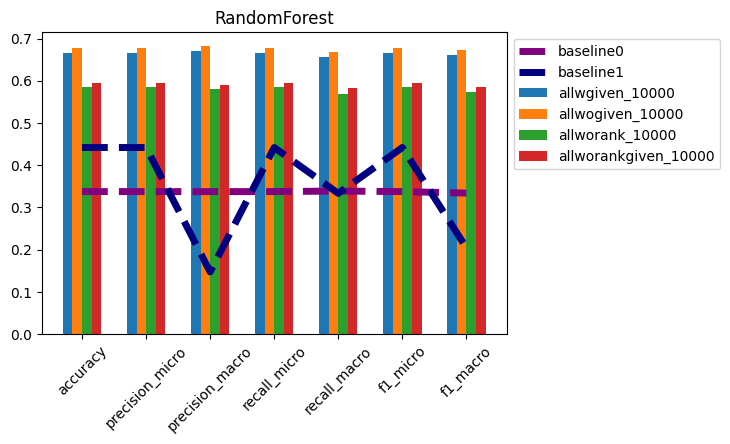

In [8]:
import numpy as np

xs = list(base2model2eval[baselist[10000][0]][modellist[0]].keys())

plt.figure(dpi=100, figsize=(6,4))
# property legend
ys = []
algonames = []
basecolor=['purple', 'navy']
baseindex = 0

for basename in base2model2eval.keys():
    for modelname in ["RandomForest", "baseline0", "baseline1"]:
        _y = []
        if "baseline" in modelname:
            if baseindex < 2:
                for x in xs:
                    _y.append(base2model2eval[basename][modelname][x])
                plt.plot(xs, _y, label=modelname, linewidth=5, linestyle='dashed', color=basecolor[baseindex])
                baseindex += 1
        else:
            algonames.append(basename)
            for x in xs:
                _y.append(base2model2eval[basename][modelname][x])
            ys.append(_y)
            
n = 4
width = 0.6
_X = np.arange(len(xs))

for i in range(n):
    plt.bar(_X - width/2. + i/float(n)*width, ys[i], 
            width=width/float(n), align="edge", label=algonames[i])   
plt.xticks(_X, xs, rotation=45)
plt.title("RandomForest")
plt.legend(bbox_to_anchor=(1,1))

### Compare model when using all features

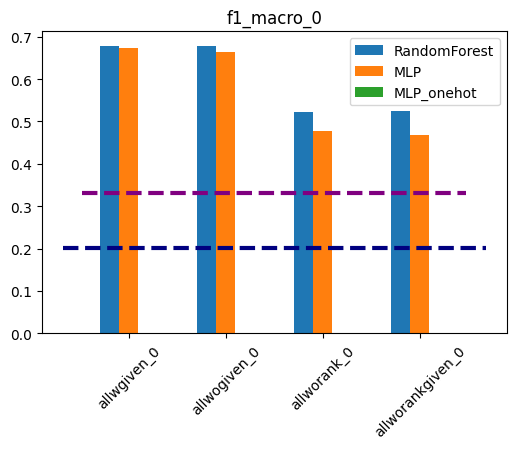

In [10]:
import numpy as np

evalname = "f1_macro"
k = 0

xs = baselist[k]

plt.figure(dpi=100, figsize=(6,4))
# property legend
ys = []
modelnames = []
basecolor=['purple', 'navy']
baseindex = 0

for modelname in modellist:
    if "base" in modelname:
        continue
    _y = []
    modelnames.append(modelname)
    for x in xs:
        if modelname not in base2model2eval[x]:
            _y.append(0)
        else:
            _y.append(base2model2eval[x][modelname][evalname])
    ys.append(_y)
    
n = len(ys)
width = 0.6
_X = np.arange(len(xs))
for i in range(n):
    plt.bar(_X - width/2. + i/float(n)*width, ys[i], 
            width=width/float(n), align="edge", label=modelnames[i])  
    
for basemodel_idx, basemodel in enumerate(["baseline0", "baseline1"]):
    xmin, xmax = plt.xlim()
    plt.hlines(base2model2eval[xs[0]][basemodel][evalname], xmin, xmax, linestyle='dashed', linewidth=3, color=basecolor[basemodel_idx])
            
plt.xticks(_X, xs, rotation=45)
plt.title(evalname + "_" + str(k))
plt.legend(bbox_to_anchor=(1,1))